## Notebook under construction 

## Gradient Descent with TensorFlow

* Builds the computational Graph for the forward pass
* Displays the graph on TensorBoard
* Using the TensorFlow Optimizer to minimize the loss

<a href="https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_03/gradient_descent_with_tensorflow.ipynb"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="open in colab">
</a>
| [open in colab](https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_03/gradient_descent_with_tensorflow.ipynb)


In [0]:

import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
# Blood Pressure data
x = [22, 41, 52, 23, 41, 54, 24, 46, 56, 27, 47, 57, 28, 48, 58,  9, 
     49, 59, 30, 49, 63, 32, 50, 67, 33, 51, 71, 35, 51, 77, 40, 51, 81]
y = [131, 139, 128, 128, 171, 105, 116, 137, 145, 106, 111, 141, 114, 
     115, 153, 123, 133, 157, 117, 128, 155, 122, 183,
     176,  99, 130, 172, 121, 133, 178, 147, 144, 217] 
x = np.asarray(x, np.float32) 
y = np.asarray(y, np.float32)

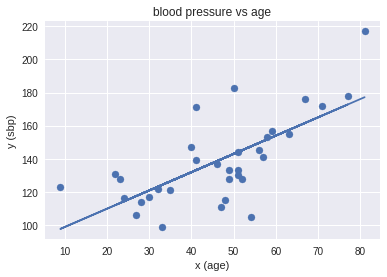

intercept =  87.67143 solpe =  1.1050216


In [9]:
plt.scatter(x=x,y=y)
plt.title("blood pressure vs age")
plt.xlabel("x (age)")
plt.ylabel("y (sbp)")

from sklearn.linear_model import LinearRegression
model = LinearRegression()
res = model.fit(x.reshape((len(x),1)), y)
predictions = model.predict(x.reshape((len(x),1)))
plt.plot(x, predictions)
plt.show()
print("intercept = ",res.intercept_,"solpe = ", res.coef_[0],)

## Tensorflow

In [0]:
import tensorflow as tf

#### In Tensorflow we need to define the computational graph first



In [0]:
# x,y are one dimensional numpy arrays
# Defining the graph (construction phase)

tf.reset_default_graph()                                   # “Wipe the blackboard”, construct a new graph
a_  = tf.Variable(3.0, name='a_var')                       # Variables, with starting values, can be optimize later
b_  = tf.Variable(140.0, name='b_var')                     # we name them so that they look nicer in the graph
x_  = tf.constant(x, name='x_const')                       # Constants these are fixed tensors holding the data values and cannot be changed by the optimization
y_  = tf.constant(y, name='y_const')  

y_hat_ = a_*x_ + b_                                        # we symbolically calculate y_hat    
loss_ = tf.reduce_mean(tf.square(y_ - y_hat_))              #The final result, the MSE. Still symbolical

#gradients_ = tf.gradients(loss_, [a_,b_])

writer = tf.summary.FileWriter("linreg/", tf.get_default_graph())
writer.close()

In [12]:
!ls linreg

events.out.tfevents.1542216222.52687b49a85f
events.out.tfevents.1542225521.52687b49a85f
events.out.tfevents.1542225760.52687b49a85f
events.out.tfevents.1542228248.52687b49a85f
events.out.tfevents.1542228304.52687b49a85f


#### Displaying the code in Tensor Bord with colab

If you are using colab, it's currently (november 2018) not straight forward to show the graph from colab in TensorBoard. However, there is the possibility to tunnel from colab to your local box. See  https://www.dlology.com/blog/quick-guide-to-run-tensorboard-in-google-colab/ or https://stackoverflow.com/questions/47818822/can-i-use-tensorboard-with-google-colab

In [0]:
# Start Tensor Board
LOG_DIR = './linreg'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)



In [0]:
#! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
#! unzip ngrok-stable-linux-amd64.zip

In [15]:
# Start the tunnel
get_ipython().system_raw('./ngrok http 6006 &')

# Tell the ip so that one can click on it
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://a4e50d48.ngrok.io


####Lets run the Graph and feed our start values for slope a and intercept b and fetch the mse loss


In [16]:
sess = tf.Session()                            # Starts a session and grabs memory and other resources
rss_val = sess.run([loss_,], {a_:3,b_:140})        # Letting the variables a=3 b=1 flow through the graph
print(rss_val)
sess.close()                                   # Don't forget to close the session

[20826.092]


In [17]:
# Let's add an optimizer to the loss 
train_op = tf.train.GradientDescentOptimizer(learning_rate=0.0004).minimize(loss_) 
init_op = tf.global_variables_initializer()
with tf.Session() as sess: 
    sess.run(init_op) #Doing the initialization on the concrete realization of the graph
    for i in range(80000):
      #_,a_val, b_val, loss_val, gradients_val = sess.run([train_op,a_,b_, loss_,gradients_])
      _,a_val, b_val, loss_val,  = sess.run([train_op,a_,b_, loss_])
      if (i % 5000 == 0): #Trick not to print so often
        #print(a_val, b_val, loss_val,gradients_val[0],gradients_val[1])
        print(a_val, b_val, loss_val)
    #print(a_val, b_val, loss_val,gradients_val[0],gradients_val[1])
    #print(a_val, b_val, loss_val)

-2.5579152 139.88821 20826.092
0.4584417 121.21216 474.03043
0.69010633 109.19477 400.60428
0.83876675 101.483154 370.36835
0.9341623 96.5346 357.9175
0.9953787 93.35905 352.7903
1.0346644 91.321144 350.67886
1.0598692 90.01367 349.80957
1.0760521 89.1742 349.45148
1.0864205 88.63634 349.30426
1.0930761 88.2911 349.2435
1.0973638 88.068665 349.21844
1.1000648 87.928566 349.20816
1.1018075 87.838165 349.20395
1.1029078 87.78108 349.20215
1.1036431 87.742935 349.20142


In [18]:
 print(a_val, b_val, loss_val)
# optimal vlue for a:   1.1050216
# optimal vlue for b:   87.67143
# minimal loss:         349.2007871685606

1.1041983 87.71413 349.20108
